<a href="https://colab.research.google.com/github/kiranbapatla/Time-Series-Brown-Plant-Hoppper-Prediction-Weather-Parameters/blob/main/MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importimg the libraries
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential # layer after layer
from keras.layers import Dense, Dropout, BatchNormalization # dense network
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import mean_squared_error # metrices
from sklearn.metrics import r2_score # r2 value
from sklearn.metrics import mean_absolute_error as mae # MAE value
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


In [ ]:
#importing the data file in csv format from google drive files
df = pd.read_csv('/content/drive/MyDrive/BPH_MLP_LSTM/CH.csv')

In [ ]:
#information about columns in the data file like data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    102 non-null    object 
 1   SMW     102 non-null    int64  
 2   Temp    102 non-null    float64
 3   RH      102 non-null    float64
 4   RF      102 non-null    float64
 5   BPH     102 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ KB


In [ ]:
#Formating the Date column to date, month and year format
#df ['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>,
       <Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

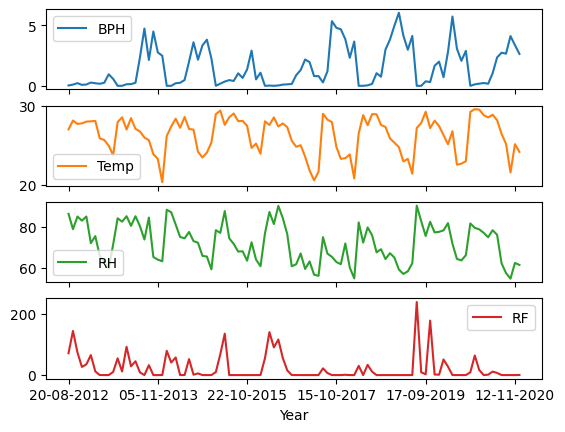

In [ ]:
#Indexing the Date column for plotting
df.set_index('Year')[['BPH','Temp','RH','RF']].plot(subplots=True)

In [ ]:
#information of data frame
df

,Year,SMW,Temp,RH,RF,BPH
0,20-08-2012,34,27.04,86.29,71.4,0.03
1,27-08-2012,35,28.16,78.86,144.4,0.10
2,03-09-2012,36,27.73,85.00,74.2,0.22
3,10-09-2012,37,27.80,83.00,26.6,0.08
4,17-09-2012,38,28.02,85.00,35.2,0.11
...,...,...,...,...,...,...
97,22-10-2020,43,26.47,62.29,0.0,2.73
98,29-10-2020,44,25.20,57.57,0.0,2.65
99,05-11-2020,45,21.59,54.86,0.0,4.10
100,12-11-2020,46,25.17,62.50,0.0,3.35


In [ ]:
# Indexing the date column
df.set_index('Year', inplace = True)

In [ ]:
# Information of data frame
df

,SMW,Temp,RH,RF,BPH
Year,,,,,
20-08-2012,34,27.04,86.29,71.4,0.03
27-08-2012,35,28.16,78.86,144.4,0.10
03-09-2012,36,27.73,85.00,74.2,0.22
10-09-2012,37,27.80,83.00,26.6,0.08
17-09-2012,38,28.02,85.00,35.2,0.11
...,...,...,...,...,...
22-10-2020,43,26.47,62.29,0.0,2.73
29-10-2020,44,25.20,57.57,0.0,2.65
05-11-2020,45,21.59,54.86,0.0,4.10


In [ ]:
# reversing the indexing of date column
df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    102 non-null    object 
 1   SMW     102 non-null    int64  
 2   Temp    102 non-null    float64
 3   RH      102 non-null    float64
 4   RF      102 non-null    float64
 5   BPH     102 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 4.9+ KB


In [ ]:
# printing the information about the data frame
print ("Rows     : " , df.shape[0])
print ("Columns   : ", df.shape[1])
print ("\nFeatures :\n" , df.columns.tolist())
print ("\nMissing values :  " , df.isnull().any())
print ("\nUnique values : \n", df.nunique())

Rows     :  102
Columns   :  5

Features :
 ['SMW', 'Temp', 'RH', 'RF', 'BPH']

Missing values :   SMW     False
Temp    False
RH      False
RF      False
BPH     False
dtype: bool

Unique values : 
 SMW     15
Temp    94
RH      94
RF      51
BPH     81
dtype: int64


In [ ]:
# plotting the weekly means
#df.resample('W').mean().plot(subplots=True)

In [ ]:
#removing the index from df
n_df=df.reset_index()

In [ ]:
n_df

,Year,SMW,Temp,RH,RF,BPH
0,20-08-2012,34,27.04,86.29,71.4,0.03
1,27-08-2012,35,28.16,78.86,144.4,0.10
2,03-09-2012,36,27.73,85.00,74.2,0.22
3,10-09-2012,37,27.80,83.00,26.6,0.08
4,17-09-2012,38,28.02,85.00,35.2,0.11
...,...,...,...,...,...,...
97,22-10-2020,43,26.47,62.29,0.0,2.73
98,29-10-2020,44,25.20,57.57,0.0,2.65
99,05-11-2020,45,21.59,54.86,0.0,4.10
100,12-11-2020,46,25.17,62.50,0.0,3.35


In [ ]:
#n_df.to_csv('weekly_mean_data.csv')

In [ ]:
print ("Rows     : " , n_df.shape[0])
print ("Columns   : ", n_df.shape[1])
print ("\nFeatures :\n" , n_df.columns.tolist())
print ("\nMissing values :  " , n_df.isnull().any())
print ("\nUnique values : \n", n_df.nunique())

Rows     :  102
Columns   :  6

Features :
 ['Year', 'SMW', 'Temp', 'RH', 'RF', 'BPH']

Missing values :   Year    False
SMW     False
Temp    False
RH      False
RF      False
BPH     False
dtype: bool

Unique values : 
 Year    102
SMW      15
Temp     94
RH       94
RF       51
BPH      81
dtype: int64


In [ ]:
#defining the new data frame as x
df_input = n_df[['BPH','Temp','RH','RF']]

In [ ]:
# information about new dataframe
df_input

,BPH,Temp,RH,RF
0,0.03,27.04,86.29,71.4
1,0.10,28.16,78.86,144.4
2,0.22,27.73,85.00,74.2
3,0.08,27.80,83.00,26.6
4,0.11,28.02,85.00,35.2
...,...,...,...,...
97,2.73,26.47,62.29,0.0
98,2.65,25.20,57.57,0.0
99,4.10,21.59,54.86,0.0
100,3.35,25.17,62.50,0.0


In [ ]:
# descriptive statistics of df
df_input.describe()

,BPH,Temp,RH,RF
count,102.000000,102.000000,102.000000,102.000000
mean,1.527745,26.283627,72.152647,23.151961
std,1.637133,2.329471,9.461082,42.634783
min,0.000000,20.360000,54.860000,0.000000
25%,0.162500,24.797500,63.800000,0.000000
50%,0.800000,27.065000,72.430000,0.200000
75%,2.710000,28.102500,79.657500,29.800000
max,6.020000,29.590000,90.290000,239.000000


In [ ]:
#Scaling the data from 0 to 1
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
# info ablut scaled data
data_scaled

array([[0.00498339, 0.72372698, 0.88710133, 0.29874477],
       [0.0166113 , 0.84507042, 0.67739204, 0.6041841 ],
       [0.03654485, 0.79848321, 0.8506915 , 0.31046025],
       [0.01328904, 0.80606717, 0.79424217, 0.11129707],
       [0.01827243, 0.82990249, 0.8506915 , 0.14728033],
       [0.0448505 , 0.83423619, 0.48574654, 0.27364017],
       [0.03488372, 0.8396533 , 0.58255715, 0.05020921],
       [0.0282392 , 0.60021668, 0.31047135, 0.        ],
       [0.04152824, 0.57854821, 0.22579735, 0.        ],
       [0.15780731, 0.50162514, 0.13914762, 0.        ],
       [0.09468439, 0.36944745, 0.46768275, 0.04309623],
       [0.        , 0.82340195, 0.82641829, 0.2292887 ],
       [0.        , 0.88840737, 0.78012983, 0.04853556],
       [0.02159468, 0.72156013, 0.85464296, 0.3874477 ],
       [0.02325581, 0.87757313, 0.7236805 , 0.11966527],
       [0.04152824, 0.73022752, 0.85464296, 0.18912134],
       [0.39036545, 0.69555796, 0.71775332, 0.03598326],
       [0.78405316, 0.61213434,

In [ ]:
# defining the input
input = data_scaled

In [ ]:
# shape of input data (rows, columns)
input.shape

(102, 4)

In [ ]:
# info about input
input

array([[0.00498339, 0.72372698, 0.88710133, 0.29874477],
       [0.0166113 , 0.84507042, 0.67739204, 0.6041841 ],
       [0.03654485, 0.79848321, 0.8506915 , 0.31046025],
       [0.01328904, 0.80606717, 0.79424217, 0.11129707],
       [0.01827243, 0.82990249, 0.8506915 , 0.14728033],
       [0.0448505 , 0.83423619, 0.48574654, 0.27364017],
       [0.03488372, 0.8396533 , 0.58255715, 0.05020921],
       [0.0282392 , 0.60021668, 0.31047135, 0.        ],
       [0.04152824, 0.57854821, 0.22579735, 0.        ],
       [0.15780731, 0.50162514, 0.13914762, 0.        ],
       [0.09468439, 0.36944745, 0.46768275, 0.04309623],
       [0.        , 0.82340195, 0.82641829, 0.2292887 ],
       [0.        , 0.88840737, 0.78012983, 0.04853556],
       [0.02159468, 0.72156013, 0.85464296, 0.3874477 ],
       [0.02325581, 0.87757313, 0.7236805 , 0.11966527],
       [0.04152824, 0.73022752, 0.85464296, 0.18912134],
       [0.39036545, 0.69555796, 0.71775332, 0.03598326],
       [0.78405316, 0.61213434,

In [ ]:
# defining the output
output = data_scaled[:,0]

In [ ]:
# info about output
output

array([0.00498339, 0.0166113 , 0.03654485, 0.01328904, 0.01827243,
       0.0448505 , 0.03488372, 0.0282392 , 0.04152824, 0.15780731,
       0.09468439, 0.        , 0.        , 0.02159468, 0.02325581,
       0.04152824, 0.39036545, 0.78405316, 0.3538206 , 0.74418605,
       0.45681063, 0.41196013, 0.        , 0.        , 0.03488372,
       0.04152824, 0.07973422, 0.33222591, 0.59634551, 0.35714286,
       0.55315615, 0.63122924, 0.37375415, 0.        , 0.02990033,
       0.05813953, 0.07807309, 0.06644518, 0.17109635, 0.10797342,
       0.22425249, 0.48172757, 0.08803987, 0.17940199, 0.        ,
       0.00332226, 0.        , 0.00498339, 0.0166113 , 0.01993355,
       0.02491694, 0.1461794 , 0.21594684, 0.36046512, 0.32392027,
       0.13289037, 0.13289037, 0.04651163, 0.19933555, 0.88538206,
       0.79401993, 0.77408638, 0.63787375, 0.38372093, 0.60631229,
       0.        , 0.        , 0.00664452, 0.02657807, 0.17275748,
       0.12458472, 0.49667774, 0.63289037, 0.82392027, 1.     

In [ ]:
# shape of output data (rows, columns)
output.shape

(102,)

In [ ]:
# Splitting the input and output data
x_train,x_test,y_train,y_test = train_test_split(input,output,test_size = 0.30, random_state=555, shuffle = False)

In [ ]:
#input shape of training data after splitting
x_train.shape

(71, 4)

In [ ]:
y_train.shape

(71,)

In [ ]:
#input shape of testing data after splitting
x_test.shape

(31, 4)

In [ ]:
y_test.shape

(31,)

In [ ]:
# traing and testing data generation
win_length = 1 # past data
batch_size = 1
num_features = 4 # 4 features(YSB, Temp, RH, RF)

In [ ]:
TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)[0]

(array([[[0.00498339, 0.72372698, 0.88710133, 0.29874477]]]),
 array([0.0166113]))

In [ ]:
# traing and testing data generation
train_generator = TimeseriesGenerator(x_train, y_train, length = win_length, sampling_rate = 1, batch_size = batch_size)
test_generator =  TimeseriesGenerator(x_test, y_test, length = win_length, sampling_rate = 1, batch_size = batch_size)

In [ ]:
# MLP model topology
#model = Sequential()
#model.add(Dense(64,input_shape=(win_length, num_features) , activation='sigmoid'))
#model.add(BatchNormalization())  # Adding Batch Normalization
#model.add(Dense(64, activation='sigmoid'))
#model.add(BatchNormalization())  # Adding Batch Normalization
#model.add(Dense(1, activation='sigmoid'))

In [ ]:
#summary of model (no. of nodes in each hidden layer and output layer)
model = Sequential()
model.add(Dense(100,input_shape = (win_length,num_features), activation = 'sigmoid'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1, 100)            500       
                                                                 
 dense_2 (Dense)             (None, 1, 1)              101       
                                                                 
Total params: 601 (2.35 KB)
Trainable params: 601 (2.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#model fitting
#optimizer = Adam(learning_rate=0.001)  # Adjusted learning rate
#model.compile(loss='mse', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_generator, epochs =50, validation_data = test_generator, batch_size=32)

Epoch 1/50
70/70 [==============================] - 1s 6ms/step - loss: 0.0610 - acc: 0.1286 - val_loss: 0.1069 - val_acc: 0.1000
Epoch 2/50
70/70 [==============================] - 1s 10ms/step - loss: 0.0582 - acc: 0.1286 - val_loss: 0.1070 - val_acc: 0.1000
Epoch 3/50
70/70 [==============================] - 1s 9ms/step - loss: 0.0573 - acc: 0.1286 - val_loss: 0.1078 - val_acc: 0.1000
Epoch 4/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0557 - acc: 0.1286 - val_loss: 0.0993 - val_acc: 0.1000
Epoch 5/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0554 - acc: 0.1286 - val_loss: 0.0996 - val_acc: 0.1000
Epoch 6/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0548 - acc: 0.1286 - val_loss: 0.0915 - val_acc: 0.1000
Epoch 7/50
70/70 [==============================] - 0s 3ms/step - loss: 0.0532 - acc: 0.1286 - val_loss: 0.1039 - val_acc: 0.1000
Epoch 8/50
70/70 [==============================] - 0s 7ms/step - loss: 0.0524 - acc: 0.1

In [ ]:
# Extracting feature importance
first_layer_weights = model.layers[0].get_weights()[0]
feature_importance_weights = np.mean(np.abs(first_layer_weights), axis=1)
feature_importance = feature_importance_weights / np.sum(feature_importance_weights)*100

In [ ]:
# Print feature importance
feature_names = ['BPH (t-1)', 'Temperature', 'Relative Humidity', 'Rainfall']
for name, importance in zip(feature_names, feature_importance):
    print(f'{name}: {importance:.4f}')

BPH (t-1): 48.0692
Temperature: 10.8465
Relative Humidity: 9.5751
Rainfall: 31.5092


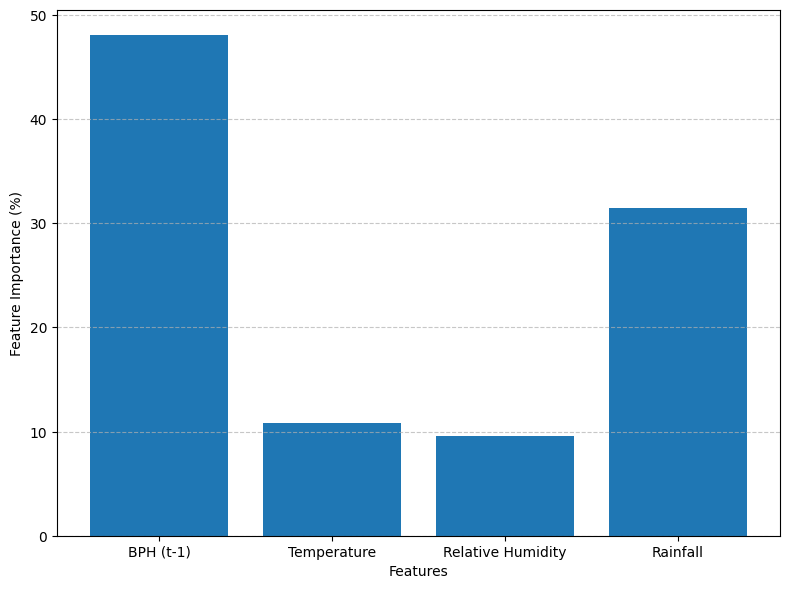

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importance)
#plt.title('Feature Importance from MLP Model Weights')
plt.xlabel('Features')
plt.ylabel('Feature Importance (%)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('MLP_feature_importance.pdf', dpi=300)
plt.show()

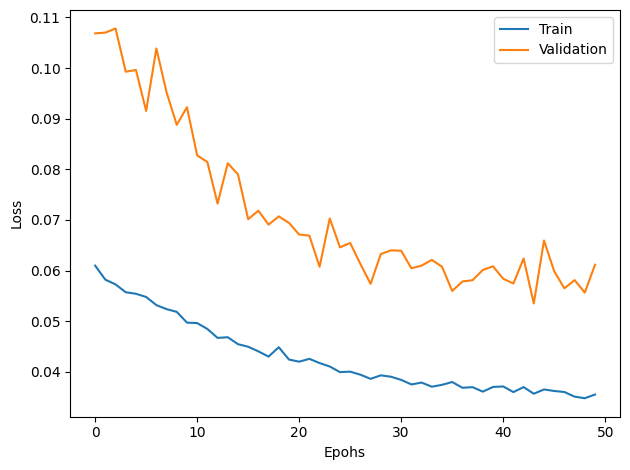

In [ ]:
# Model training and validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epohs')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.tight_layout()

In [ ]:
#model evaluation
model.evaluate_generator(train_generator, verbose = 0)
model.evaluate_generator(test_generator, verbose = 0)

<ipython-input-57-d041f2dfc28d>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(train_generator, verbose = 0)
<ipython-input-57-d041f2dfc28d>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose = 0)


[0.06114773452281952, 0.13333334028720856]

In [ ]:
# prediction of training and testing data
predictions_train = model.predict_generator(train_generator)
predictions_test = model.predict_generator(test_generator)

<ipython-input-58-fc2d809f150a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_train = model.predict_generator(train_generator)
<ipython-input-58-fc2d809f150a>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions_test = model.predict_generator(test_generator)


In [ ]:
#shape of prediction train and test
predictions_train.shape[0], predictions_test.shape[0]

(70, 30)

In [ ]:
# array of train and test predictions
predictions_train, predictions_test

(array([[[0.08031074]],
 
        [[0.05321641]],
 
        [[0.08807797]],
 
        [[0.11485504]],
 
        [[0.11058221]],
 
        [[0.0986062 ]],
 
        [[0.13616799]],
 
        [[0.13389787]],
 
        [[0.13762522]],
 
        [[0.17567481]],
 
        [[0.1331218 ]],
 
        [[0.09270217]],
 
        [[0.12675074]],
 
        [[0.0725192 ]],
 
        [[0.1198652 ]],
 
        [[0.10527414]],
 
        [[0.2825424 ]],
 
        [[0.53250843]],
 
        [[0.2204748 ]],
 
        [[0.48811227]],
 
        [[0.3048679 ]],
 
        [[0.2529316 ]],
 
        [[0.07210375]],
 
        [[0.09878223]],
 
        [[0.10147093]],
 
        [[0.14411104]],
 
        [[0.16642301]],
 
        [[0.19985025]],
 
        [[0.42259917]],
 
        [[0.24915688]],
 
        [[0.36277276]],
 
        [[0.41825247]],
 
        [[0.28060195]],
 
        [[0.13102391]],
 
        [[0.09813751]],
 
        [[0.06068848]],
 
        [[0.16559906]],
 
        [[0.16504122]],
 
        [[0.

In [ ]:
predictions_train.shape

(70, 1, 1)

In [ ]:
predictions_train.ndim

3

In [ ]:
predictions_test.shape

(30, 1, 1)

In [ ]:
predictions_test.ndim

3

In [ ]:
# Change the dimension of the prediction train from 3D to 2D
predictions_train = predictions_train.reshape((70,1)) # take train values from prediction train
predictions_train

array([[0.08031074],
       [0.05321641],
       [0.08807797],
       [0.11485504],
       [0.11058221],
       [0.0986062 ],
       [0.13616799],
       [0.13389787],
       [0.13762522],
       [0.17567481],
       [0.1331218 ],
       [0.09270217],
       [0.12675074],
       [0.0725192 ],
       [0.1198652 ],
       [0.10527414],
       [0.2825424 ],
       [0.53250843],
       [0.2204748 ],
       [0.48811227],
       [0.3048679 ],
       [0.2529316 ],
       [0.07210375],
       [0.09878223],
       [0.10147093],
       [0.14411104],
       [0.16642301],
       [0.19985025],
       [0.42259917],
       [0.24915688],
       [0.36277276],
       [0.41825247],
       [0.28060195],
       [0.13102391],
       [0.09813751],
       [0.06068848],
       [0.16559906],
       [0.16504122],
       [0.20160723],
       [0.17556141],
       [0.22228622],
       [0.32991838],
       [0.15032671],
       [0.17678978],
       [0.09398064],
       [0.05087246],
       [0.07501216],
       [0.059

In [ ]:
# Change the dimension of the prediction test from 3D to 2D
predictions_test = predictions_test.reshape((30,1)) # take train values from prediction test
predictions_test

array([[0.36982384],
       [0.43835717],
       [0.55428874],
       [0.65367943],
       [0.44510585],
       [0.32796034],
       [0.42250064],
       [0.02491717],
       [0.12485746],
       [0.16128413],
       [0.0438372 ],
       [0.24505487],
       [0.26866764],
       [0.11915857],
       [0.27925754],
       [0.6395896 ],
       [0.3269895 ],
       [0.23864347],
       [0.31338343],
       [0.13287772],
       [0.09899525],
       [0.13815962],
       [0.1522024 ],
       [0.14615072],
       [0.1922025 ],
       [0.29915106],
       [0.3355607 ],
       [0.31663385],
       [0.42600366],
       [0.38424113]], dtype=float32)

In [ ]:
predictions_train.shape

(70, 1)

In [ ]:
predictions_test.shape

(30, 1)

In [ ]:
#array of training and testing input data
x_train, x_test

(array([[0.00498339, 0.72372698, 0.88710133, 0.29874477],
        [0.0166113 , 0.84507042, 0.67739204, 0.6041841 ],
        [0.03654485, 0.79848321, 0.8506915 , 0.31046025],
        [0.01328904, 0.80606717, 0.79424217, 0.11129707],
        [0.01827243, 0.82990249, 0.8506915 , 0.14728033],
        [0.0448505 , 0.83423619, 0.48574654, 0.27364017],
        [0.03488372, 0.8396533 , 0.58255715, 0.05020921],
        [0.0282392 , 0.60021668, 0.31047135, 0.        ],
        [0.04152824, 0.57854821, 0.22579735, 0.        ],
        [0.15780731, 0.50162514, 0.13914762, 0.        ],
        [0.09468439, 0.36944745, 0.46768275, 0.04309623],
        [0.        , 0.82340195, 0.82641829, 0.2292887 ],
        [0.        , 0.88840737, 0.78012983, 0.04853556],
        [0.02159468, 0.72156013, 0.85464296, 0.3874477 ],
        [0.02325581, 0.87757313, 0.7236805 , 0.11966527],
        [0.04152824, 0.73022752, 0.85464296, 0.18912134],
        [0.39036545, 0.69555796, 0.71775332, 0.03598326],
        [0.784

In [ ]:
#array of training and testing output data
y_train, y_test

(array([0.00498339, 0.0166113 , 0.03654485, 0.01328904, 0.01827243,
        0.0448505 , 0.03488372, 0.0282392 , 0.04152824, 0.15780731,
        0.09468439, 0.        , 0.        , 0.02159468, 0.02325581,
        0.04152824, 0.39036545, 0.78405316, 0.3538206 , 0.74418605,
        0.45681063, 0.41196013, 0.        , 0.        , 0.03488372,
        0.04152824, 0.07973422, 0.33222591, 0.59634551, 0.35714286,
        0.55315615, 0.63122924, 0.37375415, 0.        , 0.02990033,
        0.05813953, 0.07807309, 0.06644518, 0.17109635, 0.10797342,
        0.22425249, 0.48172757, 0.08803987, 0.17940199, 0.        ,
        0.00332226, 0.        , 0.00498339, 0.0166113 , 0.01993355,
        0.02491694, 0.1461794 , 0.21594684, 0.36046512, 0.32392027,
        0.13289037, 0.13289037, 0.04651163, 0.19933555, 0.88538206,
        0.79401993, 0.77408638, 0.63787375, 0.38372093, 0.60631229,
        0.        , 0.        , 0.00664452, 0.02657807, 0.17275748,
        0.12458472]),
 array([0.49667774, 0.6328

In [ ]:
# Slicing the output column from the train and test data
x_train[:,1:][win_length:], x_test[:,1:][win_length:]

(array([[0.84507042, 0.67739204, 0.6041841 ],
        [0.79848321, 0.8506915 , 0.31046025],
        [0.80606717, 0.79424217, 0.11129707],
        [0.82990249, 0.8506915 , 0.14728033],
        [0.83423619, 0.48574654, 0.27364017],
        [0.8396533 , 0.58255715, 0.05020921],
        [0.60021668, 0.31047135, 0.        ],
        [0.57854821, 0.22579735, 0.        ],
        [0.50162514, 0.13914762, 0.        ],
        [0.36944745, 0.46768275, 0.04309623],
        [0.82340195, 0.82641829, 0.2292887 ],
        [0.88840737, 0.78012983, 0.04853556],
        [0.72156013, 0.85464296, 0.3874477 ],
        [0.87757313, 0.7236805 , 0.11966527],
        [0.73022752, 0.85464296, 0.18912134],
        [0.69555796, 0.71775332, 0.03598326],
        [0.61213434, 0.5362687 , 0.        ],
        [0.57638137, 0.83657917, 0.13556485],
        [0.38461538, 0.29635902, 0.        ],
        [0.31960997, 0.2599492 , 0.        ],
        [0.        , 0.23793395, 0.        ],
        [0.63380282, 0.94355066, 0

In [ ]:
x_train[:,1:][win_length:].shape

(70, 3)

In [ ]:
x_test[:,1:][win_length:].shape

(30, 3)

In [ ]:
# concatinating/appending the predicted and train/test dataframes into one dataframe
df_train_pred = pd.concat([pd.DataFrame(predictions_train), pd.DataFrame(x_train[:,1:][win_length:])], axis = 1)
df_test_pred = pd.concat([pd.DataFrame(predictions_test), pd.DataFrame(x_test[:,1:][win_length:])], axis = 1)

In [ ]:
# inversing the normalized values of predicted and train/test dataframes
rev_trans_train = scaler.inverse_transform(df_train_pred)
rev_trans_test = scaler.inverse_transform(df_test_pred)

In [ ]:
rev_trans_train, rev_trans_test

(array([[  0.48347065,  28.16      ,  78.86      , 144.4       ],
        [  0.32036278,  27.73      ,  85.        ,  74.2       ],
        [  0.53022938,  27.8       ,  83.        ,  26.6       ],
        [  0.69142732,  28.02      ,  85.        ,  35.2       ],
        [  0.6657049 ,  28.06      ,  72.07      ,  65.4       ],
        [  0.59360932,  28.11      ,  75.5       ,  12.        ],
        [  0.81973129,  25.9       ,  65.86      ,   0.        ],
        [  0.80606518,  25.7       ,  62.86      ,   0.        ],
        [  0.82850381,  24.99      ,  59.79      ,   0.        ],
        [  1.05756236,  23.77      ,  71.43      ,  10.3       ],
        [  0.80139326,  27.96      ,  84.14      ,  54.8       ],
        [  0.55806708,  28.56      ,  82.5       ,  11.6       ],
        [  0.76303944,  27.02      ,  85.14      ,  92.6       ],
        [  0.43656557,  28.46      ,  80.5       ,  28.6       ],
        [  0.72158851,  27.1       ,  85.14      ,  45.2       ],
        [ 

In [ ]:
#creating the data frame based on original dataframe
x = n_df[['BPH','Temp','RH','RF']]

In [ ]:
# Slicing the shape of train and test data frames based on prediction shapes
df_train_final = x[:predictions_train.shape[0]]
df_test_final = x[predictions_test.shape[0]*-1:]

In [ ]:
df_train_final.count(), df_test_final.count()

(BPH     70
 Temp    70
 RH      70
 RF      70
 dtype: int64,
 BPH     30
 Temp    30
 RH      30
 RF      30
 dtype: int64)

In [ ]:
# Appending the predicted column to the train and test dataframe
df_train_final['BPH_Pred'] = rev_trans_train[:,0]
df_test_final['BPH_Pred'] = rev_trans_test[:,0]

<ipython-input-80-4c90a41468cb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_final['BPH_Pred'] = rev_trans_train[:,0]
<ipython-input-80-4c90a41468cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_final['BPH_Pred'] = rev_trans_test[:,0]


In [ ]:
df_train_final

,BPH,Temp,RH,RF,BPH_Pred
0,0.03,27.04,86.29,71.4,0.483471
1,0.10,28.16,78.86,144.4,0.320363
2,0.22,27.73,85.00,74.2,0.530229
3,0.08,27.80,83.00,26.6,0.691427
4,0.11,28.02,85.00,35.2,0.665705
...,...,...,...,...,...
65,0.00,26.54,82.14,30.2,0.619973
66,0.00,28.84,72.36,0.0,0.844079
67,0.04,27.57,79.71,33.4,0.647322
68,0.16,28.97,75.93,11.0,0.837792


In [ ]:
df_test_final

,BPH,Temp,RH,RF,BPH_Pred
72,3.81,25.90,67.21,0.0,2.226340
73,4.96,25.36,65.07,0.0,2.638910
74,6.02,24.79,59.29,0.0,3.336818
75,4.14,22.99,57.14,0.0,3.935150
76,2.97,23.31,58.43,0.0,2.679537
77,4.11,21.44,62.29,0.0,1.974321
78,0.00,27.21,90.29,239.0,2.543454
79,0.00,27.84,82.71,9.2,0.150001
80,0.37,29.27,75.57,2.4,0.751642
81,0.31,27.20,82.43,178.1,0.970930


In [ ]:
# calculate root mean square error (RMSE)

trainScore = math.sqrt(mean_squared_error(df_train_final['BPH'], df_train_final['BPH_Pred']))
print('Train Score: %2f RMSE' %(trainScore))

testScore = math.sqrt(mean_squared_error(df_test_final['BPH'], df_test_final['BPH_Pred']))
print('Test Score: %2f RMSE' %(testScore))

# calculate coefficient of determination (r2)

r2 = r2_score(df_train_final['BPH'], df_train_final['BPH_Pred'])
print(('Train Score: %2f r2' %(r2)))

r2 = r2_score(df_test_final['BPH'], df_test_final['BPH_Pred'])
print(('Test Score: %2f r2' %(r2)))

# calculate mean absolute error (MAE)

MAE = mae(df_train_final['BPH'], df_train_final['BPH_Pred'])
print(('Train Score: %2f MAE' %(MAE)))

MAE = mae(df_test_final['BPH'], df_test_final['BPH_Pred'])
print(('Test Score: %2f MAE' %(MAE)))

Train Score: 0.732994 RMSE
Test Score: 1.488630 RMSE
Train Score: 0.752512 r2
Test Score: 0.293144 r2
Train Score: 0.610588 MAE
Test Score: 1.157624 MAE


In [ ]:
#Calculating Pseudo r squared values for train data (used for non-linear regression models)
def pseudo_r2_mlp(x_true, x_pred):

    # Ensure correct shapes for y_true and y_pred
    x_true = df_train_final['BPH'].values
    x_pred = df_train_final['BPH_Pred'].values

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(df_train_final['BPH'], df_train_final['BPH_Pred'])

    # Calculate variance of ground truth (adjusted for potential bias)
    var_true = np.var(df_train_final['BPH'], ddof=1)  # Use ddof=1 for unbiased variance

    # Handle potential division by zero (if variance is very small)
    if var_true < 1e-10:
        var_true = 1e-10  # Set a small minimum value to avoid zero division

    # Calculate pseudo R-squared
    pseudo_r2 = 1 - (mse / var_true)

    return pseudo_r2

In [ ]:
#Calculating Pseudo r squared values for train data (used for non-linear regression models)
x_true = df_train_final['BPH'].values
x_pred = df_train_final['BPH_Pred'].values
pseudo_r2_value = pseudo_r2_mlp(x_true, x_pred)
print("Pseudo R-squared train data:", pseudo_r2_value)

Pseudo R-squared train data: 0.7560478787551506


In [ ]:
#Calculating Pseudo r squared values for test data (used for non-linear regression models)
def pseudo_r2_mlp(y_true, y_pred):

    # Ensure correct shapes for y_true and y_pred
    y_true = df_test_final['BPH'].values
    y_pred = df_test_final['BPH_Pred'].values

    # Calculate mean squared error (MSE)
    mse = mean_squared_error(df_test_final['BPH'], df_test_final['BPH_Pred'])

    # Calculate variance of ground truth (adjusted for potential bias)
    var_true = np.var(df_test_final['BPH'], ddof=1)  # Use ddof=1 for unbiased variance

    # Handle potential division by zero (if variance is very small)
    if var_true < 1e-10:
        var_true = 1e-10  # Set a small minimum value to avoid zero division

    # Calculate pseudo R-squared
    pseudo_r2 = 1 - (mse / var_true)

    return pseudo_r2

In [ ]:
#Calculating Pseudo r squared values for test data (used for non-linear regression models)
y_true = df_test_final['BPH'].values
y_pred = df_test_final['BPH_Pred'].values
pseudo_r2_value = pseudo_r2_mlp(x_true, x_pred)
print("Pseudo R-squared test data:", pseudo_r2_value)

Pseudo R-squared test data: 0.31670618702895315


In [ ]:
print("Train start Date: ", n_df['Year'].iloc[0]) # start date of training data
print("Train end Date: ", n_df['Year'].iloc[69]) # End date of traing data (look s.no. train_data_final)
print("Test start Date: ", n_df['Year'].iloc[72]) # start date of test data
print("Test end Date: ", n_df['Year'].iloc[101]) # End date of test data (look s.no. test_data_final)

Train start Date:  20-08-2012
Train end Date:  01-10-2018
Test start Date:  22-10-2018
Test end Date:  19-11-2020


In [ ]:
# train_data_export
train_act_pred = pd.DataFrame(columns=['MSW', 'Actual', 'Predicted'])
#train_act_pred['MSW'] = n_df[0:70]['SMW'] # if dates are present in data
train_act_pred['MSW'] = range(1,71)
train_act_pred['Actual'] = df_train_final['BPH']
train_act_pred['Predicted'] = df_train_final['BPH_Pred']
train_act_pred.to_csv('MLP_train_act_pred.csv')

In [ ]:
# test_data_export
test_act_pred = pd.DataFrame(columns=['MSW', 'Actual', 'Predicted'])
#train_act_pred['MSW'] = n_df[72:102]['SMW'] # if dates are present in data
test_act_pred['MSW'] = range (72,102)
df_test_final = df_test_final.set_index(test_act_pred.index) # set the both dataframes index same
test_act_pred['Actual'] = df_test_final['BPH']
test_act_pred['Predicted'] = df_test_final['BPH_Pred']
test_act_pred.to_csv('MLP_test_act_pred.csv')

In [ ]:
test_act_pred

,MSW,Actual,Predicted
0,72,3.81,2.226340
1,73,4.96,2.638910
2,74,6.02,3.336818
3,75,4.14,3.935150
4,76,2.97,2.679537
5,77,4.11,1.974321
6,78,0.00,2.543454
7,79,0.00,0.150001
8,80,0.37,0.751642
9,81,0.31,0.970930


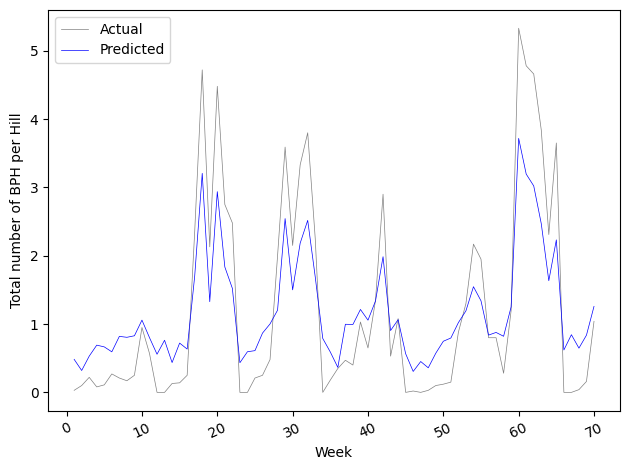

In [ ]:
# train plot
plt.plot(train_act_pred['MSW'], train_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(train_act_pred['MSW'], train_act_pred['Predicted'], color = 'blue', lw = 0.5)
plt.ylabel('Total number of BPH per Hill')
plt.xlabel('Week')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('MLP_train_actual_predicted.pdf', dpi=300)
plt.show()

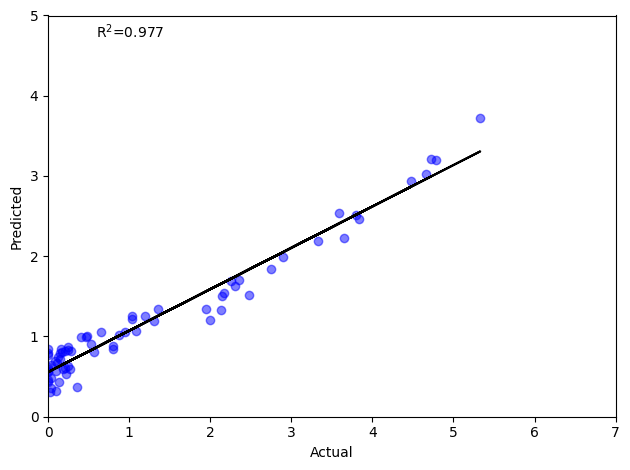

In [ ]:
# Scatter plot with regression line
plt.scatter(train_act_pred['Actual'],train_act_pred['Predicted'], color = 'blue', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(train_act_pred['Actual'], train_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(train_act_pred['Actual'], m*train_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(0,7)
plt.ylim(0,5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
#plt.legend('R2: ' + str(r2_score(train_act_pred['Actual'], train_act_pred['Predicted'])))
rvalue = stats.linregress(train_act_pred['Actual'],train_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('MLP_train_actual_scatter_plot.pdf', dpi=300)
plt.show()

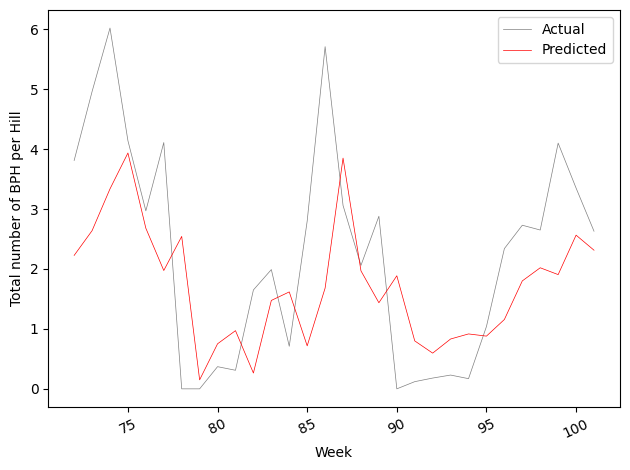

In [ ]:
# test plot
plt.plot(test_act_pred['MSW'], test_act_pred['Actual'], color = 'grey', lw = 0.5)
plt.plot(test_act_pred['MSW'], test_act_pred['Predicted'], color = 'red', lw = 0.5)
plt.ylabel('Total number of BPH per Hill')
plt.xlabel('Week')
plt.xticks(rotation = 25)
plt.legend(['Actual', 'Predicted'])
plt.tight_layout()
plt.savefig('MLP_test_actual_predicted.pdf', dpi=300)
plt.show()

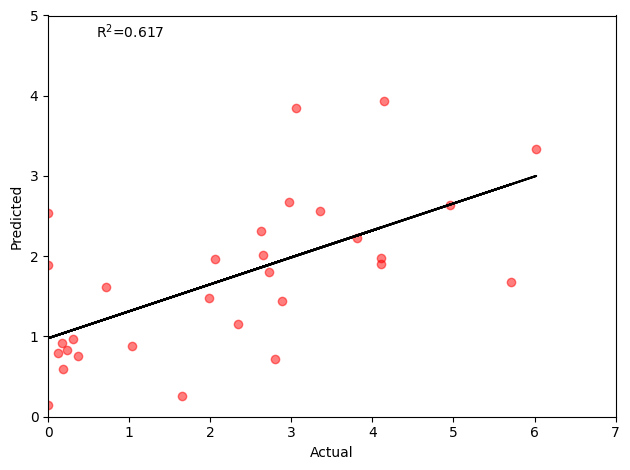

In [ ]:
# Scatter plot with regression line
plt.scatter(test_act_pred['Actual'],test_act_pred['Predicted'], color = 'red', alpha = 0.5)
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(test_act_pred['Actual'], test_act_pred['Predicted'], 1)
#add linear regression line to scatterplot
plt.plot(test_act_pred['Actual'], m*test_act_pred['Actual']+b, color='black') #(x, m*x+b)
plt.xlim(0,7)
plt.ylim(0,5)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.tight_layout()
rvalue = stats.linregress(test_act_pred['Actual'],test_act_pred['Predicted'])
plt.annotate("R$^2$=%.3f"%(rvalue.rvalue),xy=(0.15,0.9),xycoords='figure fraction')
plt.savefig('MLP_test_actual_scatter_plot.pdf', dpi=300)
plt.show()